[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Dollar Real Effective Exchange Rate'}, xlabel='Date'>

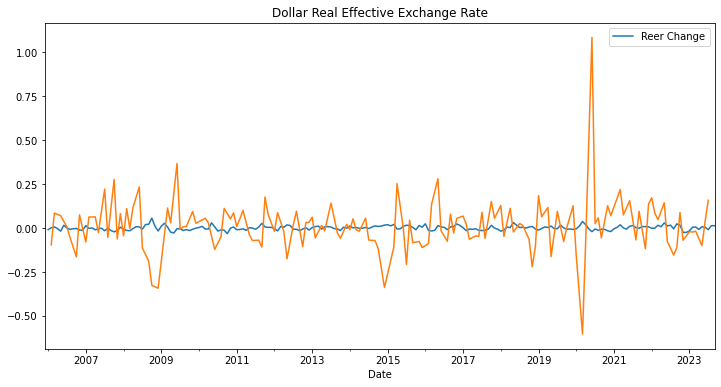

In [15]:
import pandas as pd
import yfinance as yf
# Import a 3 Month Treasury Bill Rate from yahoo
tbill_3_month = yf.download('^IRX', start='2005-12-01', end='2023-08-01')
tbill_10_yr = yf.download('^TNX', start='2005-12-01', end='2023-08-01')
ycurve_slope = tbill_10_yr['Close'] - tbill_3_month['Close']

reer_data = pd.read_excel('dollar_reer.xls', header=10)
reer_data['Reer Change'] = reer_data['RBUSBIS'].pct_change().dropna()

# Plot Reer data
reer_data.plot(x='observation_date', y='Reer Change', figsize=(12,6), title='Dollar Real Effective Exchange Rate')

# Fetch monthly crude oil price data from yahoo finance
oil = yf.download('CL=F', start='2005-12-01', end='2023-08-01')
oil = oil.loc[oil.index.is_month_end]['Close']
oil.pct_change().plot()

<AxesSubplot:xlabel='Date'>

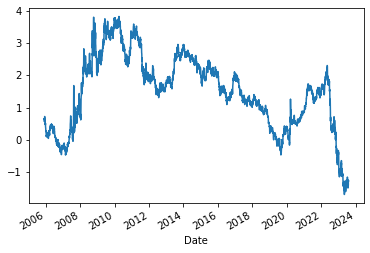

In [21]:
ycurve_slope.plot()

In [31]:
# Filter tbill dataframe so that only the last days of months are left
tbill = tbill.loc[tbill.index.is_month_end]

In [22]:
reer_data

,observation_date,RBUSBIS,Reer Change
0,2005-12-01,94.38,NaN
1,2006-01-01,93.50,-0.009324
2,2006-02-01,93.65,0.001604
3,2006-03-01,94.22,0.006086
4,2006-04-01,93.95,-0.002866
...,...,...,...
209,2023-05-01,106.73,0.007552
210,2023-06-01,107.22,0.004591
211,2023-07-01,106.21,-0.009420
212,2023-08-01,107.67,0.013746
